# 1.1 Cleaning data

In [177]:
import pandas as pd

df = pd.read_csv('price_history.csv')
df.dropna(inplace = True)

df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

def convert_currency1(value):
    value = value.replace('$', '').strip()
    if 'K' in value:
        return float(value.replace(' K', '').strip()) * 1e3 
    elif 'm' in value:
        return float(value.replace(' m', '').strip()) * 1e6
    elif 'bn' in value:
        return float(value.replace(' bn', '').strip()) * 1e9 
    else:
        return float(value)

def convert_currency2(value):
    return float(value.replace('$', '').strip())

#Remove symbols and convert to numbers only
for column in ['Open', 'High', 'Low', 'Close']:
  df[column] = df[column].apply(convert_currency2)

for column1 in ['Volume','Market Cap']:
    df[column1] = df[column1].apply(convert_currency1)

df['Volume(BAT)'] = df['Volume(BAT)'].astype(int)

print(df.head(5))

df.to_csv('cleaned_data.csv', index=False)

        Date    Open    High     Low   Close     Volume  Volume(BAT)  \
0 2024-08-31  0.1652  0.1659  0.1610  0.1637  5400000.0     33146598   
1 2024-08-30  0.1651  0.1673  0.1592  0.1656  8400000.0     51006750   
2 2024-08-29  0.1644  0.1695  0.1622  0.1651  7600000.0     45993558   
3 2024-08-28  0.1694  0.1749  0.1631  0.1646  9700000.0     57370894   
4 2024-08-27  0.1782  0.1801  0.1680  0.1693  8400000.0     47307996   

    Market Cap  
0  244900000.0  
1  245900000.0  
2  248200000.0  
3  252400000.0  
4  264300000.0  


# 1.2 Preparing the model

In [179]:
from sklearn.model_selection import train_test_split

x = df[['Open','High','Low','Close','Volume','Volume(BAT)','Market Cap']]
y = df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.dtypes)

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Volume(BAT)      int64
Market Cap     float64
dtype: object


# 1.3 Train model

In [181]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

# 1.4 Evaluate model

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_predict = model.predict(x_test)

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

x_future = x[-10:]
y_future_prediction = model.predict(x_future)

print("Prediction:",y_future_prediction)
print("Actual:",y[-10:])

Mean Absolute Error: 0.0006226508538899597
Mean Squared Error: 4.724902521821557e-06
R-squared: 0.9999338566753319
Prediction: [0.196971 0.225115 0.223222 0.238654 0.259958 0.291728 0.285619 0.165995
 0.156526 0.170943]
Actual: 2622    0.1970
2623    0.2251
2624    0.2232
2625    0.2386
2626    0.2601
2627    0.2917
2628    0.2855
2629    0.1660
2630    0.1566
2631    0.1710
Name: Close, dtype: float64


# 1.5 Visualise model performance

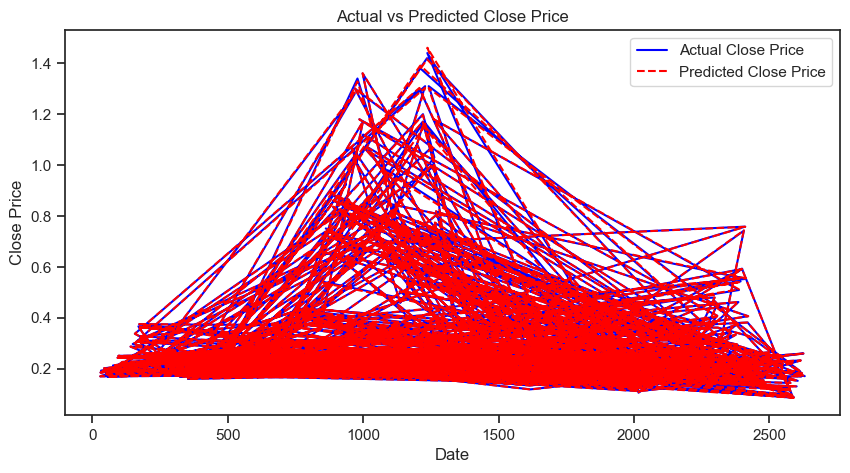

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_predict, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

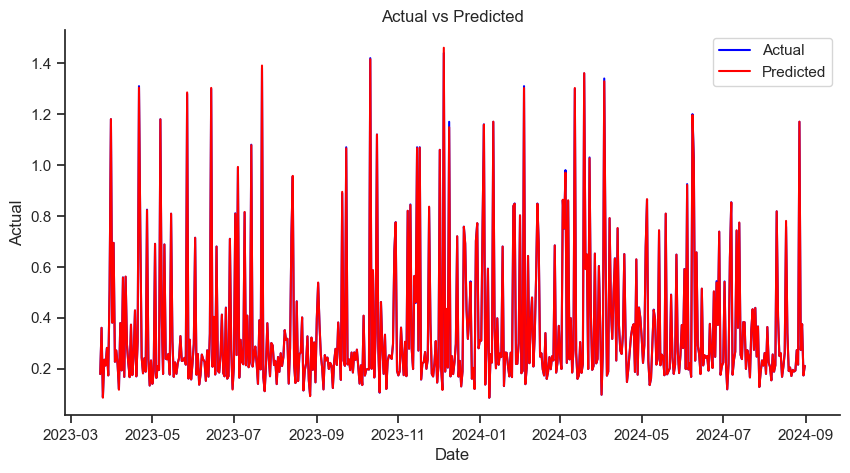

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea; sea.set()

#Add to dataframe
df['Predicted'] = y_predict
df['Actual'] = y_test

plt.figure(figsize=(10,5))
sea.set_style('ticks')
sea.lineplot(data=df, x='Date', y='Actual', color='blue', label='Actual')
sea.lineplot(data=df, x='Date', y='Predicted', color='red', label='Predicted')
sea.despine()
plt.title('Actual vs Predicted')

# 1.6 Make Predictions

Text(0.5, 1.0, 'Plot')

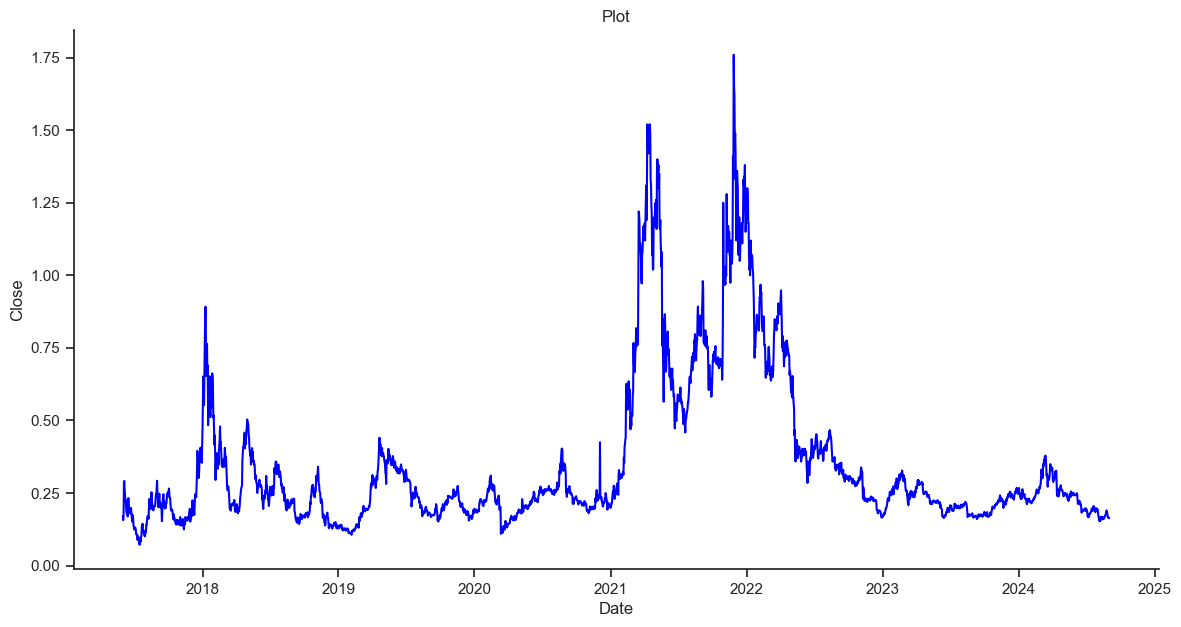

In [225]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
sns.set_style('ticks')
sns.lineplot(data=df, x='Date', y='Close', color='blue')
sns.despine()
plt.title('Plot')